<h1><b><i>E-Commerce Customer Churn</b></i></h1>
<h3><b>Problem Statement</b>: </h3>
    <p align = 'justify'>E-commerce online EDA adalah perusahaan pada bidang retail yang ingin menghindari adanya pelanggan yang churn karena persaingan di dunia e-commerce yang sangat ketat. Persaingan ketat dapat menyebabkan terjadi penurunan aktivitas pelanggan terhadap produk bisnis (e-commerce EDA) yang berdampak terhadap terjadinya penurunan pendapatan. Persaingan ketat ditandai dengan adanya penurunan frekuensi customer mengunjungi situs e-commerce EDA berdasarkan daysincelastorder. EDA ingin tahu siapa pelanggan yang berpotensi churn melalui churn rate untuk menghindari penurunan pelanggan dan dampak buruk terhadap perusahaan. Kemudian, ketika diketahui potensi churn dari pelanggan, salah satu solusinya dapat dilakukan dengan memberi promo untuk mencegah terjadinya churn.</p>
<h3><b>Goal</b>:</h3>
<p align ='justify'> Menemukan poin-poin yang dapat direkomendasikan untuk meningkatkan engagement
dan menurunkan customer churn rate seperti promo (discount atau jumlah cashback)
yang berhubungan dengan kategori barang yang sering diorder pelanggan beberapa
bulan kebelakang. Pencapaian churn rate yang rendah setelah memberikan tindakan
preventif terhadap perilaku customer yang akan churn melalui ML yang telah di bangun
berdasarkan data historis customer.</p>
<h3><b>Objective</b>: 
</h3>
<li>Mengidentifikasi feature apa yang mempengaruhi customerr untuk churn</li>
<li> Membangun model yang memberikan angka probabilitas kemungkinan churn menggunakan metode <i>supervised learning</i> (klasifikasi)</li>
<li>Memprediksi customer mana yang kedepannya berpotensial mengalami churn</li>
<li>Mengidentifikasi aksi apa yang akan memiliki dampak paling besar untuk me-<i>retain</i> customer</li>
<h3><b>Business Metrics</b>:</h3>
<li>Customer Churn Rate (Main)</li>
<li>Satisfaction Score, Complain Score (Secondary)</li>

<h4><i>Tentang Tim EDA</i></h4>
<p align = 'right'>Sebagai tim data scientist Perusahaan E-Commerce EDA yang bertanggung jawab dalam
meningkatkan performa Perusahaan khususnya dalam kuantitas dan kualitas customer
dengan memberikan rekomendasi untuk mendapatkan loyalitas customer berdasarkan
learning data historis.</p>

<h4><i>Tim Kami</i></h4>
<li>Innocentia Handani</li>
<li>Steven Matlian S</li>
<li>Rizka Septiani</li>
<li>Amalia Kusumaningtyas</li>
<li>Ryan Dwi Prasetyo</li>
<li>Naomi Damanik</li>
<li>Kinanti Salsabila Putri</li>
<li>Inge Oktaviani</li>

# Import library & package

In [44]:
#library and package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.3.4
0.12.2
3.6.3


In [2]:
!pip install matplotlib --upgrade --user

Active code page: 1252


# Exploratory Data Analysis

<b>TIPS & TRICK:</b><br>
<p class ='tab'> <li> fokus pada kecepatan dan kelengkapan eksplorasi bukan estetika visualisasi</li>
<li>jangan menggali business insight karna EDA untuk mempermudah modeling</li>
</p>

<head>
<style>
table, th, td {
  border: ipx solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>
<h1> Variable Description </h1>

<table>
<tr>
  <th>Variable</th>
  <th>Description</th>
</tr>
  <td>CustomerID</td>
  <td>Unique customer ID</td>
</tr>
<tr>
  <td>Churn</td>
  <td>Churn Flag</td>
</tr>
<tr>
  <td>Tenure</td>
  <td>Tenure of customer in organization</td>
</tr>
<tr>
  <td>PreferredLoginDevice</td>
  <td>Preferred login device of customer</td>
</tr>
<tr>
  <td>CityTier</td>
  <td>City tier</td>
</tr><tr>
  <td>WarehouseToHome</td>
  <td>Distance in between warehouse to home of customer</td>
</tr><tr>
  <td>PreferredPaymentMode</td>
  <td>Gender of customer</td>
</tr><tr>
  <td>Gender</td>
  <td>Preferred login device of customer</td>
</tr><tr>
  <td>HourSpendOnApp</td>
  <td>Number of hours spend on mobile application or website</td>
</tr>
<tr>
  <td>NumberOfDeviceRegistered</td>
  <td>Total number of deceives is registered on particular customer</td>
</tr>
<tr>
  <td>PreferedOrderCat</td>
  <td>Preferred order category of customer in last month</td>
</tr>
<tr>
  <td>SatisfactionScore</td>
  <td>Satisfactory score of customer on service</td>
</tr>
<tr>
  <td>MaritalStatus</td>
  <td>Marital status of customer</td>
</tr>
<tr>
  <td>NumberOfAddress</td>
  <td>Total number of added added on particular customer</td>
</tr>
<tr>
  <td>Complain</td>
  <td>Any complaint has been raised in last month</td>
</tr><tr>
  <td>OrderAmountHikeFromlastYear</td>
  <td>Percentage increases in order from last year</td>
</tr>
<tr>
  <td>CouponUsed</td>
  <td>Total number of coupon has been used in last month</td>
</tr>
<tr>
  <td>OrderCount</td>
  <td>Total number of orders has been places in last month</td>
</tr>
<tr>
  <td>DaySinceLastOrder</td>
  <td>Day Since last order by customer</td>
</tr>
<tr>
  <td>CashbackAmount</td>
  <td>Average cashback in last month</td>
</tr>
</table>
</body>

### Data Collecting

In [4]:
xls = pd.ExcelFile('E Commerce Dataset.xlsx')
df = pd.read_excel(xls, 'E Comm')
df.sample(4)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
309        50310      0     4.0         Mobile Phone         1   
1296       51297      0    20.0             Computer         1   
3322       53323      0    16.0             Computer         1   
4458       54459      0    10.0             Computer         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
309              15.0           Debit Card    Male             2.0   
1296              6.0          Credit Card  Female             3.0   
3322              9.0          Credit Card    Male             3.0   
4458             25.0           Debit Card    Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
309                          3          Fashion                  4   
1296                         3          Fashion                  4   
3322                         4     Mobile Phone                  2   
4458                         2     Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
309        Married                2         0                         25.0   
1296       Married                1         0                         18.0   
3322        Single                7         1                         15.0   
4458       Married                6         0                         19.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
309          1.0         1.0                8.0          206.48  
1296         0.0         5.0                NaN          219.57  
3322         1.0         3.0                3.0          150.15  
4458         2.0         2.0                1.0          161.88

In [5]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


<i>
<ul>Numerical data
<li>apakah nilai yang tertera pada setiap kolom masuk akal? -dari output describe-</li>
<li>apakah nilai maksimal/minimal masih berada dibatas wajar?</li>
<li>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</li>
</ul>
<hr>
<ul>Categorical data
<li>apakah jumlah unique values masuk akal?</li>
<li>apakah frekuensi dari nilai yang paling umum terlalu timpang?</li>
</ul>

### Descriptive Statistic

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df_num.describe().T

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.223030    49.207036      0.0   

                                  25%       50%         75%       max  
CustomerID                   51408.25  52815.50  54222.7500  55630.00  
Churn                            0.00      0.00      0.0000      1.00  
Tenure                           2.00      9.00     16.0000     61.00  
CityTier                         1.00      1.00      3.0000      3.00  
WarehouseToHome                  9.00     14.00     20.0000    127.00  
HourSpendOnApp                   2.00      3.00      3.0000      5.00  
NumberOfDeviceRegistered         3.00      4.00      4.0000      6.00  
SatisfactionScore                2.00      3.00      4.0000      5.00  
NumberOfAddress                  2.00      3.00      6.0000     22.00  
Complain                         0.00      0.00      1.0000      1.00  
OrderAmountHikeFromlastYear     13.00     15.00     18.0000     26.00  
CouponUsed                       1.00      1.00      2.0000     16.00  
OrderCount                       1.00      2.00      3.0000     16.00  
DaySinceLastOrder                2.00      3.00      7.0000     46.00  
CashbackAmount                 145.77    163.28    196.3925    324.99

<b>apakah nilai yang tertera pada setiap kolom masuk akal?</b><br>
<li>jumlah count berbeda-beda, artinya ada data NaN.</li>

In [8]:
df.describe().loc[['min','max']].T

min       max
CustomerID                   50001.0  55630.00
Churn                            0.0      1.00
Tenure                           0.0     61.00
CityTier                         1.0      3.00
WarehouseToHome                  5.0    127.00
HourSpendOnApp                   0.0      5.00
NumberOfDeviceRegistered         1.0      6.00
SatisfactionScore                1.0      5.00
NumberOfAddress                  1.0     22.00
Complain                         0.0      1.00
OrderAmountHikeFromlastYear     11.0     26.00
CouponUsed                       0.0     16.00
OrderCount                       1.0     16.00
DaySinceLastOrder                0.0     46.00
CashbackAmount                   0.0    324.99

<b>apakah nilai maksimal/minimal masih berada dibatas wajar?</b><br>
<li>Churn, CityTier merupakan data kategorikal</li>
<li>Apa informasi yang didapatkan dari angka tenure? Apakah lama customer menggunakan layanan?</li>
<li>WarehouseToHome, angka maksimalnya 127km, apakah ini karena mmg tidak ada warehouse yang lebih dekat atau lainnya?</li>
<li>NumberOfAddress perlu diperhatikan lebih lanjutkan jika ingin digunakan</li>

In [9]:
df.describe().loc[['mean','50%']].T

mean       50%
CustomerID                   52815.500000  52815.50
Churn                            0.168384      0.00
Tenure                          10.189899      9.00
CityTier                         1.654707      1.00
WarehouseToHome                 15.639896     14.00
HourSpendOnApp                   2.931535      3.00
NumberOfDeviceRegistered         3.688988      4.00
SatisfactionScore                3.066785      3.00
NumberOfAddress                  4.214032      3.00
Complain                         0.284902      0.00
OrderAmountHikeFromlastYear     15.707922     15.00
CouponUsed                       1.751023      1.00
OrderCount                       3.008004      2.00
DaySinceLastOrder                4.543491      3.00
CashbackAmount                 177.223030    163.28

<b>apakah ada kolom dengan perbedaan yang signifikan antara mean dan median?</b><br>
<li>NumberOfAddress kemungkinan ada outlier karena nilai maksimal adalah 22 tetapi median dan meannya berada diangka 4.2 dan 3</li>

In [10]:
df_cat.describe().T

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986

<b>apakah jumlah unique values masuk akal?</b>
<li>tidak ada yang janggal</li>
<b>apakah frekuensi dari nilai yang paling umum terlalu timpang?</b>
<li>Gender:Male, terlihat lebih dari setengah dari data</li>
<li>MartialStatus:Married, memiliki jumlah data lebih dari setengah dari 3 pilihan</li>

In [11]:
df_cat['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Apakah mobile phone dan phone sama? jika sama berarti harus di rename salah satunya <br>
apakah kalau misal di rename itu sebelum di split data atau setelah?

In [12]:
df_cat['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [13]:
df_cat['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [14]:
df_cat['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [15]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<i>
<ul>
<li>Apakah ada data dengan tipe data yang kurang sesuai?</li></i>
ya, pada CityTier dan Churn daripada numerik ada baiknya menjadi kategorikal
<i>
<li>Apakah ada data yang hilang?</li></i>
ya, terdapat 7 feature yang datanya tidak lengkap atau kosong
</ul>

### Univariate Analysis

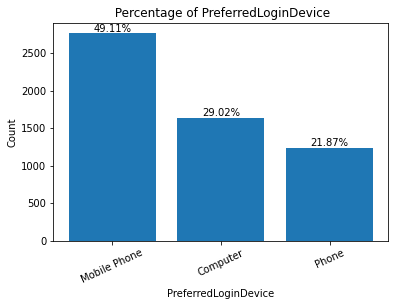

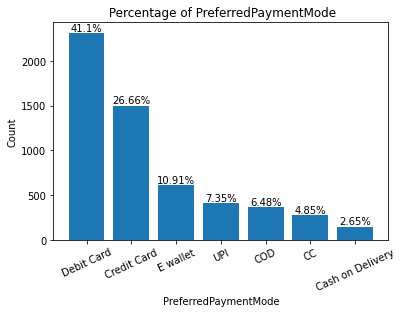

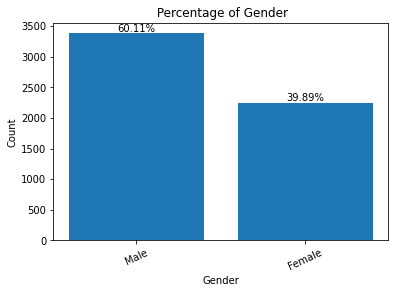

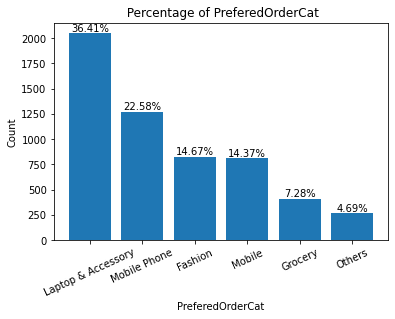

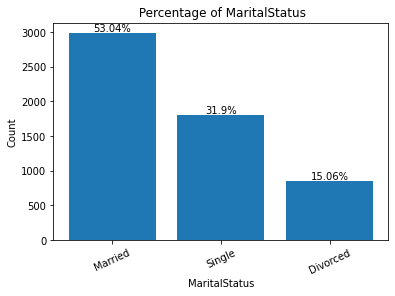

In [16]:
cat_var=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']

# Calculate the percentage of each categorical variable
for column in cat_var:
    counts = df[column].value_counts()
    percent = round((counts / len(df)) * 100,2)
    
# Create the bar plot
    fig, ax = plt.subplots()
    ax.bar(counts.index, counts)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f" Percentage of {column}")
    
    # Add the percentage labels to the bars
    for i in range(len(percent)):
        value = round(percent[i], 2)
        label = f'{value}%'
        plt.text(i, counts[i], label, ha='center', va='bottom')
        plt.xticks(rotation=25)
    
    # Show the plot
    plt.show()

Interpretasi :
Plot diatas persentase dari banyak data disetiap variable di masing masing features categorical

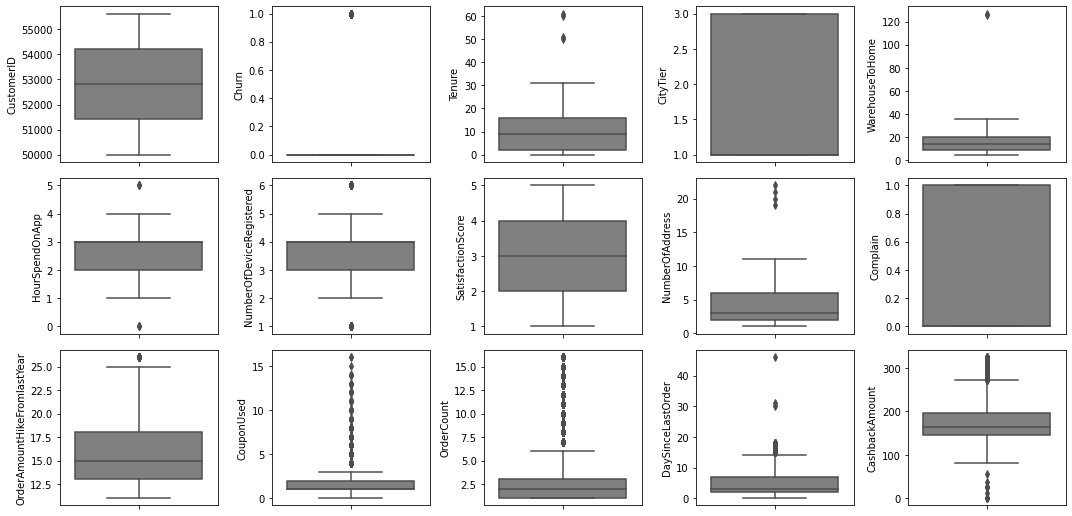

In [45]:
features = df_num.columns
fig = plt.subplots(figsize=(15,12))
for i in range(0, len(features)):
    plt.subplot(int(len(features)/3), 5, i+1)
    sns.boxplot(y=df[features[i]],color='grey', orient='v')
plt.tight_layout()
plt.show()

<li>Citytier -> categorical</li>
<li>Complain -> categorical</li>
<li>Churn -> categorical</li><br>
Berapa banyak dan berapa jauh outlier di setiap kolom?
<li> HourSpendingOnApp dan NumberOfDeliveryRegistered memiliki outlier pada nilai min dan max</li>
<li> Pada WarehouseToHome ada pencilan dengan jarak yang jauh</li>
<li> CashbackAmount memiliki banyak pencilan</li>
<li>CouponUsed dan OrderCount juga memiliki banyak pencilan</li>

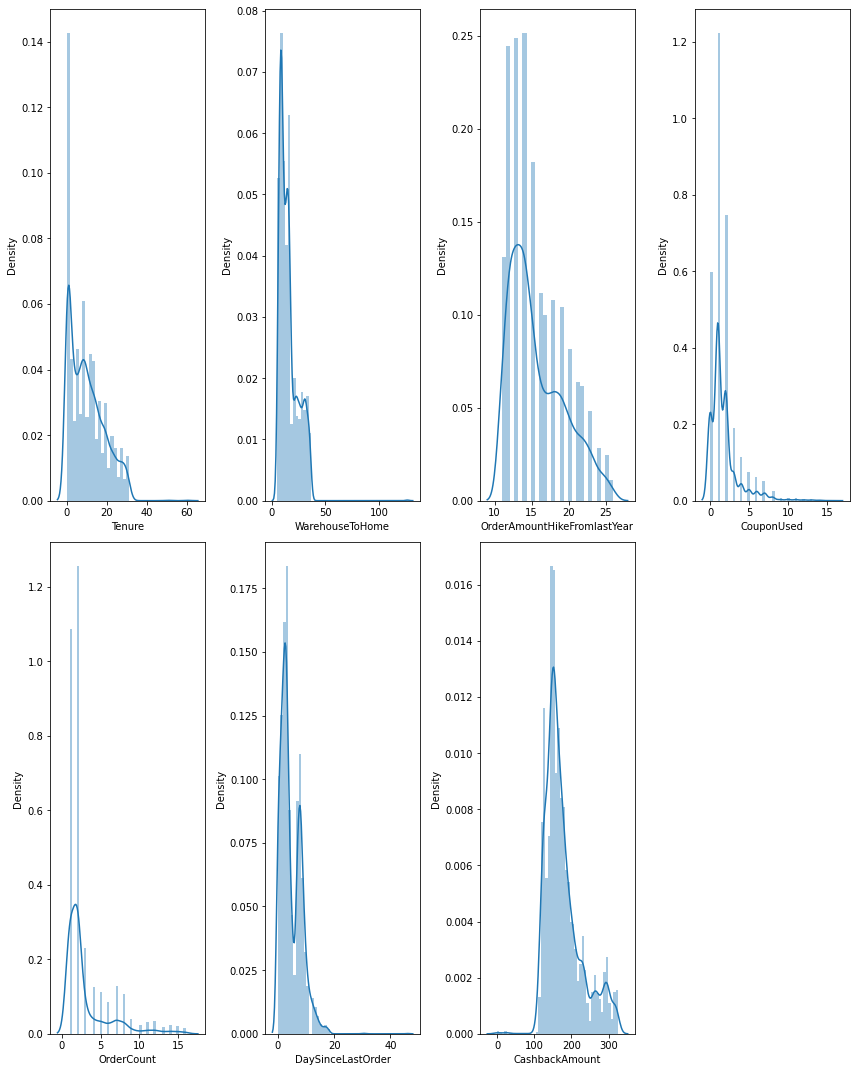

In [46]:
#individual displot for tenure, warehousetohome, OrderAmountHikeFromlastYear, couponused, ordercount,
#daysincelastorder, cashbackamount
col = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(col)):
    plt.subplot(int(len(col)/3), 4, i+1)
    sns.distplot(df[col[i]])
plt.tight_layout()
plt.show()

<ul>Individual Displot
<li>bagaimana bentuk distribusi setiap kolom?</li>
<li>apakah ada nilai-nilai tertentu yang umum?</li>
</ul>

In [47]:
num_var = df_num.columns
fig = plt.subplots(figsize=(50,30))
for i in range(0, len(num_var)):
    plt.subplot(int(len(num_var)/3),3, i+1)
    sns.distplot(df[num_var[i]])
plt.tight_layout()
plt.show()

Interpretasi :
Grafik diatas adalah distribusi setiap features.

Skew positif ▶ Tenure, WarehouseToHome ,NumberOfAddress, OrderAmountHikeFromlastYear,
       CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

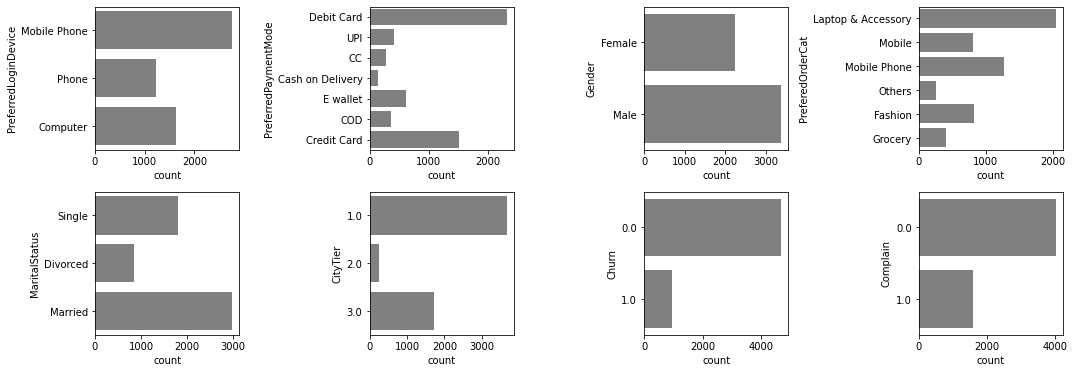

In [ ]:
#countplot for categorical
categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
               'PreferedOrderCat', 'MaritalStatus','CityTier','Churn','Complain']
fig = plt.subplots(figsize=(15,10))
for i in range (0,len(categorical)):
    plt.subplot(4,len(categorical)/2,i+1)
    sns.countplot(y=df[categorical[i]],color='gray',orient='v')
plt.tight_layout()

<ul>Individual countplot
<li>ketimpangan antar kategori, terutama pada target</li> sebaran kategori yang timpang merupakan indikasi ketidakgunaan feature. Di Target kalau timpang bisa buat <i>learning</i> gagal.
<li> Terlihat jika sebaran Churn lumayan timpang</li>
</ul>


### Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel

TypeError: countplot() got multiple values for argument 'data'

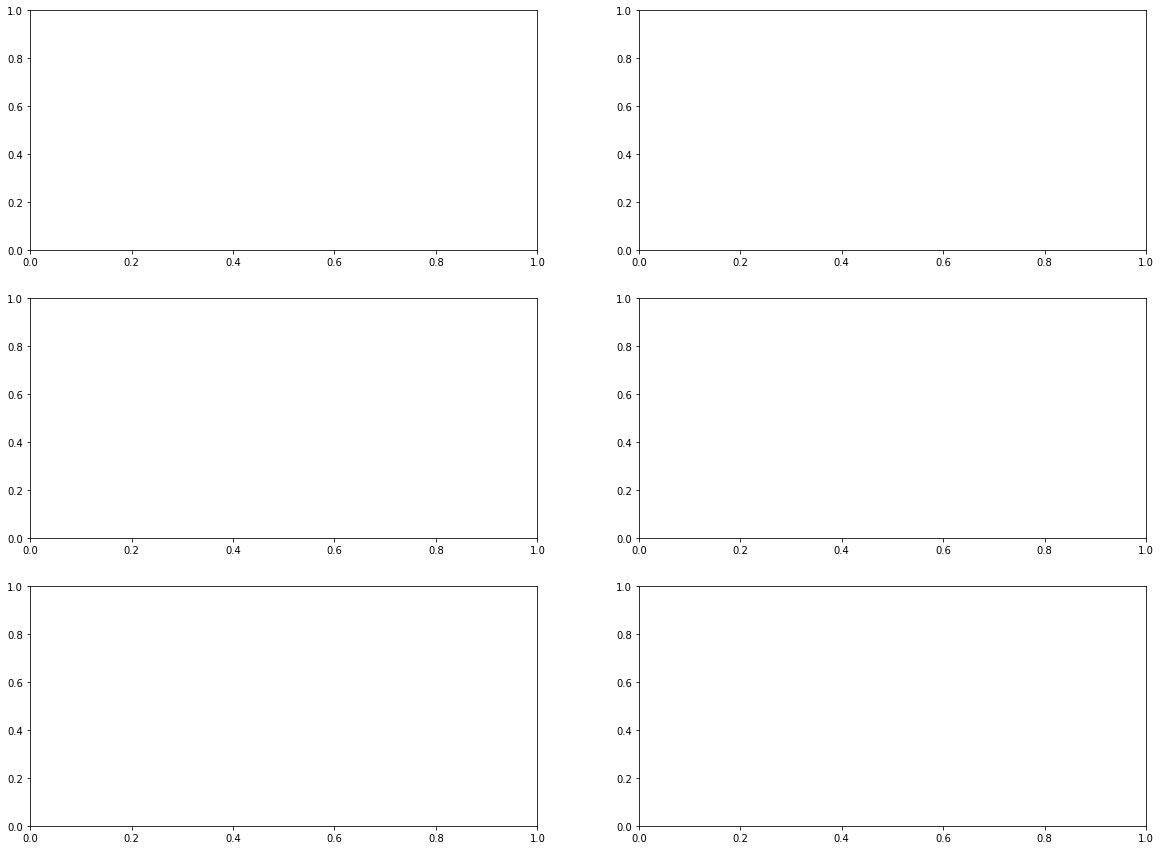

In [48]:
#data categorical
cat_var=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']
fig, axes=plt.subplots(3,2, figsize=(20,15))
for i, ax in zip(cat_var, axes.flatten()):
    sns.countplot(i, data=df, hue='Churn', ax=ax)

Interpretasi:
Dari grafik diatas dapat dilihat keterhubungan antara data categorical terhadap target.
Secara keseluruhan dari setiap grafik data categorical memiliki tingkat tidak churn yang lebih tinggi dari pada yang churn

1. PreferredLoginDevice : jumlah tingkat churn setiap kategori sama sama dibawah 500

2. PreferredPaymentMode : Debit card memiliki tingkat churn yang lebih tinggi diantara 7 kategori

3. Gender : memiliki jumlah tingkat churn yang tidak selisih jauh

4. PreferedOrderCat : Mobile Phone memiliki jumlah tingkat churn yang paling tinggi diantara 6 kategori

5. MaritalStatus : divorced adalah kategori dengan jumlah churn paling rendah diantara 3 kategori

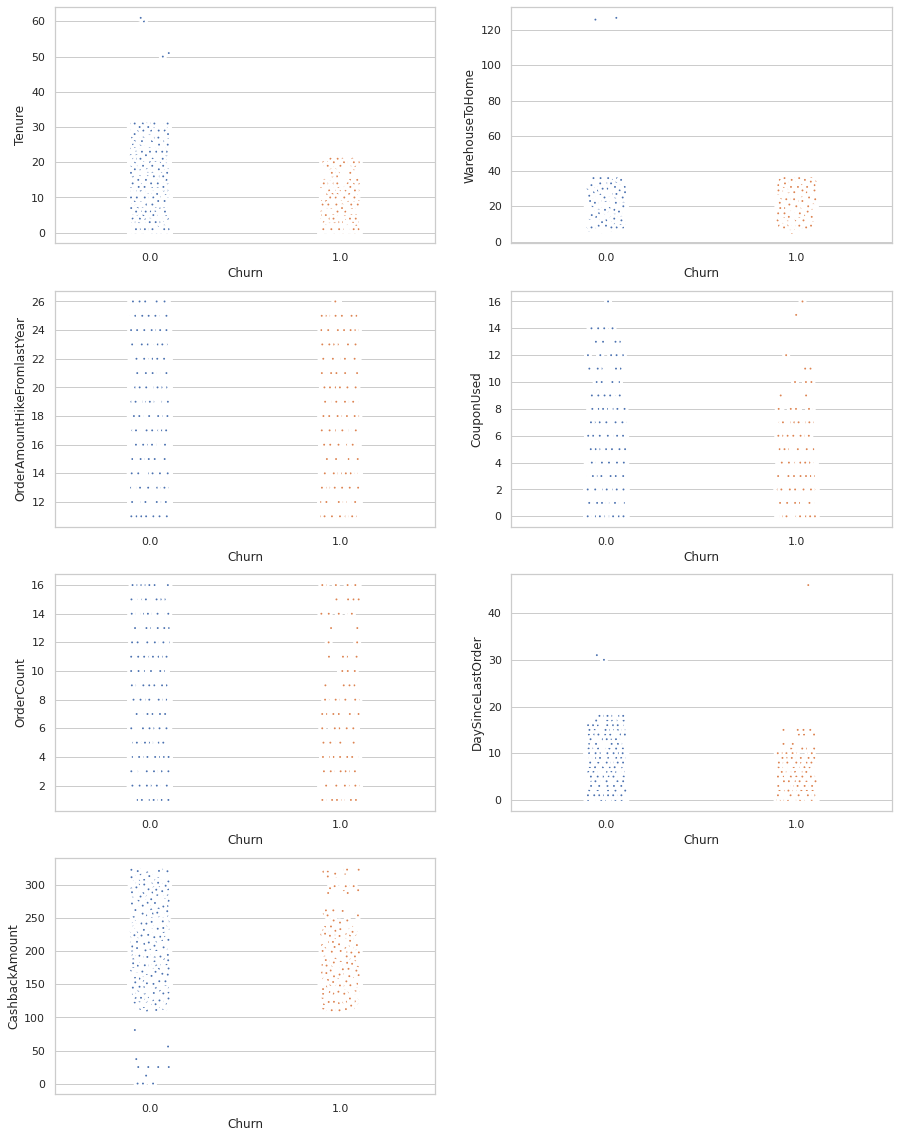

In [ ]:
#Data numerical

num = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount',
       'DaySinceLastOrder','CashbackAmount']
fig = plt.subplots(figsize=(15,20))
sns.set(style = 'whitegrid')
for i in range(0, len(num)):
    plt.subplot(4, len(num)/3, i+1)
    sns.stripplot(y=df[num[i]], x="Churn", data=df,
                  linewidth=3, edgecolor='white')

Interpretasi dari grafik stripplot di atas :
*   Outlier (lebih besar dari median) dari warehousetohome berasal dari customer yang tidak churn
*   Nilai max daysincelastorder dari customer yang churn
*   Outlier (lebih kecil dari median) pada cashbackamount berasal dari customer yang tidak churn








### Multivariate Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel

In [ ]:
#heatmap (numerical variable)
df_heatmap=df_num.corr()
df_heatmap

CustomerID     Churn    Tenure  CityTier  \
CustomerID                     1.000000 -0.019083  0.029952  0.003239   
Churn                         -0.019083  1.000000 -0.349408  0.084703   
Tenure                         0.029952 -0.349408  1.000000 -0.060688   
CityTier                       0.003239  0.084703 -0.060688  1.000000   
WarehouseToHome                0.058909  0.076630 -0.018218  0.010624   
HourSpendOnApp                 0.598417  0.018675 -0.021226 -0.009150   
NumberOfDeviceRegistered       0.411098  0.107939 -0.023983  0.027934   
SatisfactionScore             -0.033146  0.105481 -0.013903 -0.011554   
NumberOfAddress                0.160814  0.043931  0.237666 -0.029440   
Complain                      -0.009944  0.250188 -0.021268  0.003375   
OrderAmountHikeFromlastYear    0.117243 -0.010058  0.005825 -0.031408   
CouponUsed                     0.234302 -0.008264  0.129035  0.021456   
OrderCount                     0.139008 -0.028697  0.186403  0.033388   
DaySinceLastOrder              0.113243 -0.160757  0.184552  0.017525   
CashbackAmount                 0.217129 -0.154118  0.476380  0.055746   

                             WarehouseToHome  HourSpendOnApp  \
CustomerID                          0.058909        0.598417   
Churn                               0.076630        0.018675   
Tenure                             -0.018218       -0.021226   
CityTier                            0.010624       -0.009150   
WarehouseToHome                     1.000000        0.060990   
HourSpendOnApp                      0.060990        1.000000   
NumberOfDeviceRegistered            0.019071        0.316800   
SatisfactionScore                   0.007722        0.031858   
NumberOfAddress                    -0.011020        0.145126   
Complain                            0.028696        0.006976   
OrderAmountHikeFromlastYear         0.038795        0.106843   
CouponUsed                         -0.003935        0.191528   
OrderCount                          0.002681        0.109575   
DaySinceLastOrder                   0.017829        0.075716   
CashbackAmount                     -0.009200        0.121490   

                             NumberOfDeviceRegistered  SatisfactionScore  \
CustomerID                                   0.411098          -0.033146   
Churn                                        0.107939           0.105481   
Tenure                                      -0.023983          -0.013903   
CityTier                                     0.027934          -0.011554   
WarehouseToHome                              0.019071           0.007722   
HourSpendOnApp                               0.316800           0.031858   
NumberOfDeviceRegistered                     1.000000          -0.017228   
SatisfactionScore                           -0.017228           1.000000   
NumberOfAddress                              0.084997           0.053583   
Complain                                     0.003407          -0.031115   
OrderAmountHikeFromlastYear                  0.069475          -0.027730   
CouponUsed                                   0.151685           0.017936   
OrderCount                                   0.103464           0.019764   
DaySinceLastOrder                            0.018208           0.032082   
CashbackAmount                               0.137183           0.003473   

                             NumberOfAddress  Complain  \
CustomerID                          0.160814 -0.009944   
Churn                               0.043931  0.250188   
Tenure                              0.237666 -0.021268   
CityTier                           -0.029440  0.003375   
WarehouseToHome                    -0.011020  0.028696   
HourSpendOnApp                      0.145126  0.006976   
NumberOfDeviceRegistered            0.084997  0.003407   
SatisfactionScore                   0.053583 -0.031115   
NumberOfAddress                     1.000000 -0.026399   
Complain                           -0.

Text(0.5, 1.0, 'Correlation Feature')

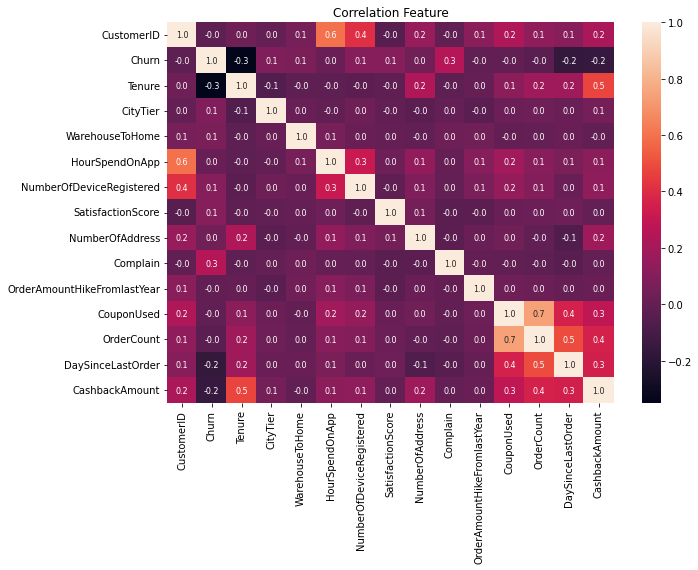

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df_heatmap, annot=True, fmt="0.1f", annot_kws={"fontsize":8})
plt.title('Correlation Feature')

Interpretasi :
Heatmap diatas menggambarkan nilai korelasi antar variabel. Dapat dilihat dari tingkat kepekatan warna, semakin terang maka korelasi semakin tinggi. kalo semakin gelap maka korelasi semakin rendah. 

Atau bisa juga korelasi dikatakan sangat kuat jika nilainya melebihi 0.7 jika kurang dari tersebut korelasi antar dua variabel tersebut lemah.

Hanya korelasi antara variabel OrderAccount dan CouponUsed yang mendapat nilai 0.7

<ul>
<li>Apakah feature memiliki korelasi dengan target?</li> feature yang memiliki nilai korelasi paling tinggi dengan target adalah Complain, dengan nilai 0.3

❓ kalau misal ada yang tidak berkolerasi dengan target solusinya apa?
<li>Apakah ada 2 feature yang berkolerasi kuat (>0.7)?</li>Tidak ada yang diatas 0.7, tetapi feature OrderAccount dan CouponUsed mendapat nilai 0.7

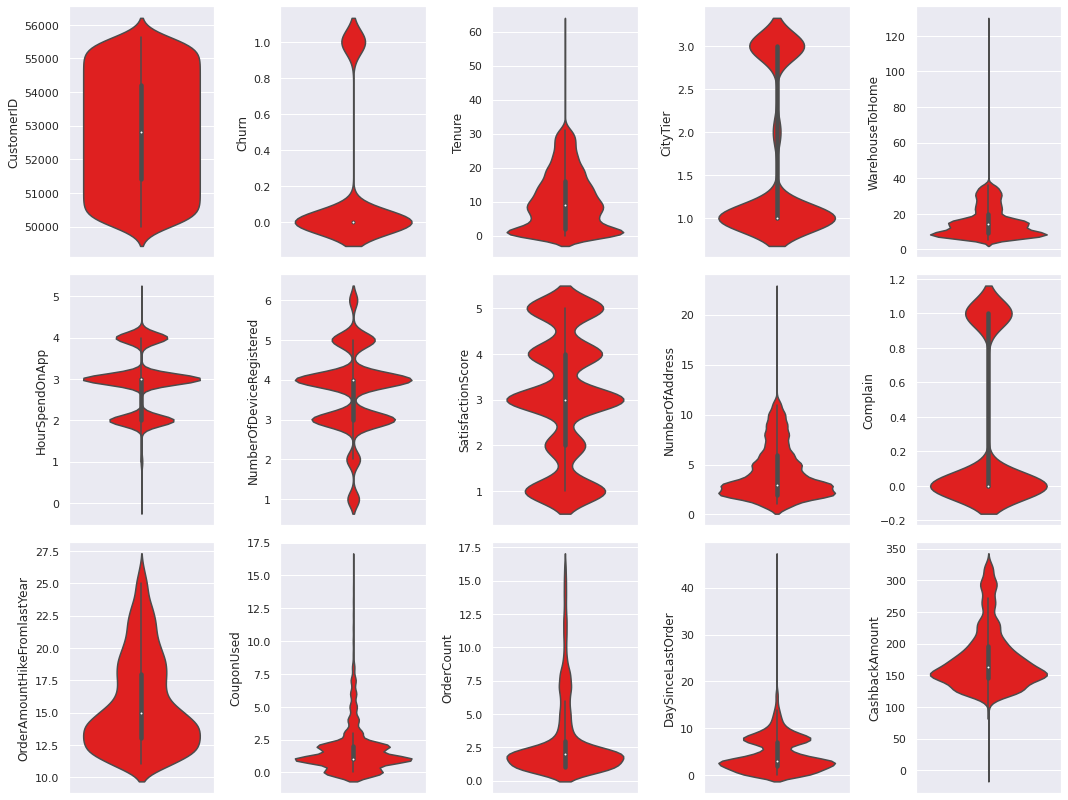

In [ ]:
#Violinplot : representation of the distribution.
var=df_num.columns

fig = plt.subplots(figsize=(15,15))
for i in range(0, len(var)):
  plt.subplot(4, len(var)/3, i+1)
  sns.violinplot(y=df[var[i]], color='red')
plt.tight_layout()
plt.show()

Interpretasi :
violin plot merupakan gabungan antara bloxplot dan distribution plot

plot diatas adalah violinplot untuk variable numerical

dilihat dari distribusi : 
1. Churn : banyak yang tidak churn 
2. Tenure : kebanyakan ada di 0
3. CityTier : class 1 lebih banyak
4. WarehouseToHome : kebanyakan ada di range 10
5. HourSpendOnApp : lebih banyak di class 3
6. NumberOfDeviceRegistered : lebih banyak di class 4
7. SatisfactionScore : lebih banyak di class 3
8. NumberOfAddress : kebanyakan ada di range 2 atau 3
9. Complain : yg tidak complain lebih banyak
10. OrderAmountHikeFromlastYear : dominasi lebih banyak di range 12.5-15
11. CouponUsed : kebanyakan ada di sekitar 1.5
12. OrderCount : dominasi lebih banyak di range 2-2.5
13. DaySinceLastOrder : lebih banyak di range sekitar 3-4
14. CashbackAmount : dominasi lebih banyak di sekitar 150


In [ ]:
#pair plots

<li>Apakah ada scatterplot yang menunjukkan cluster/pattern yang cukup jelas?</li>

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


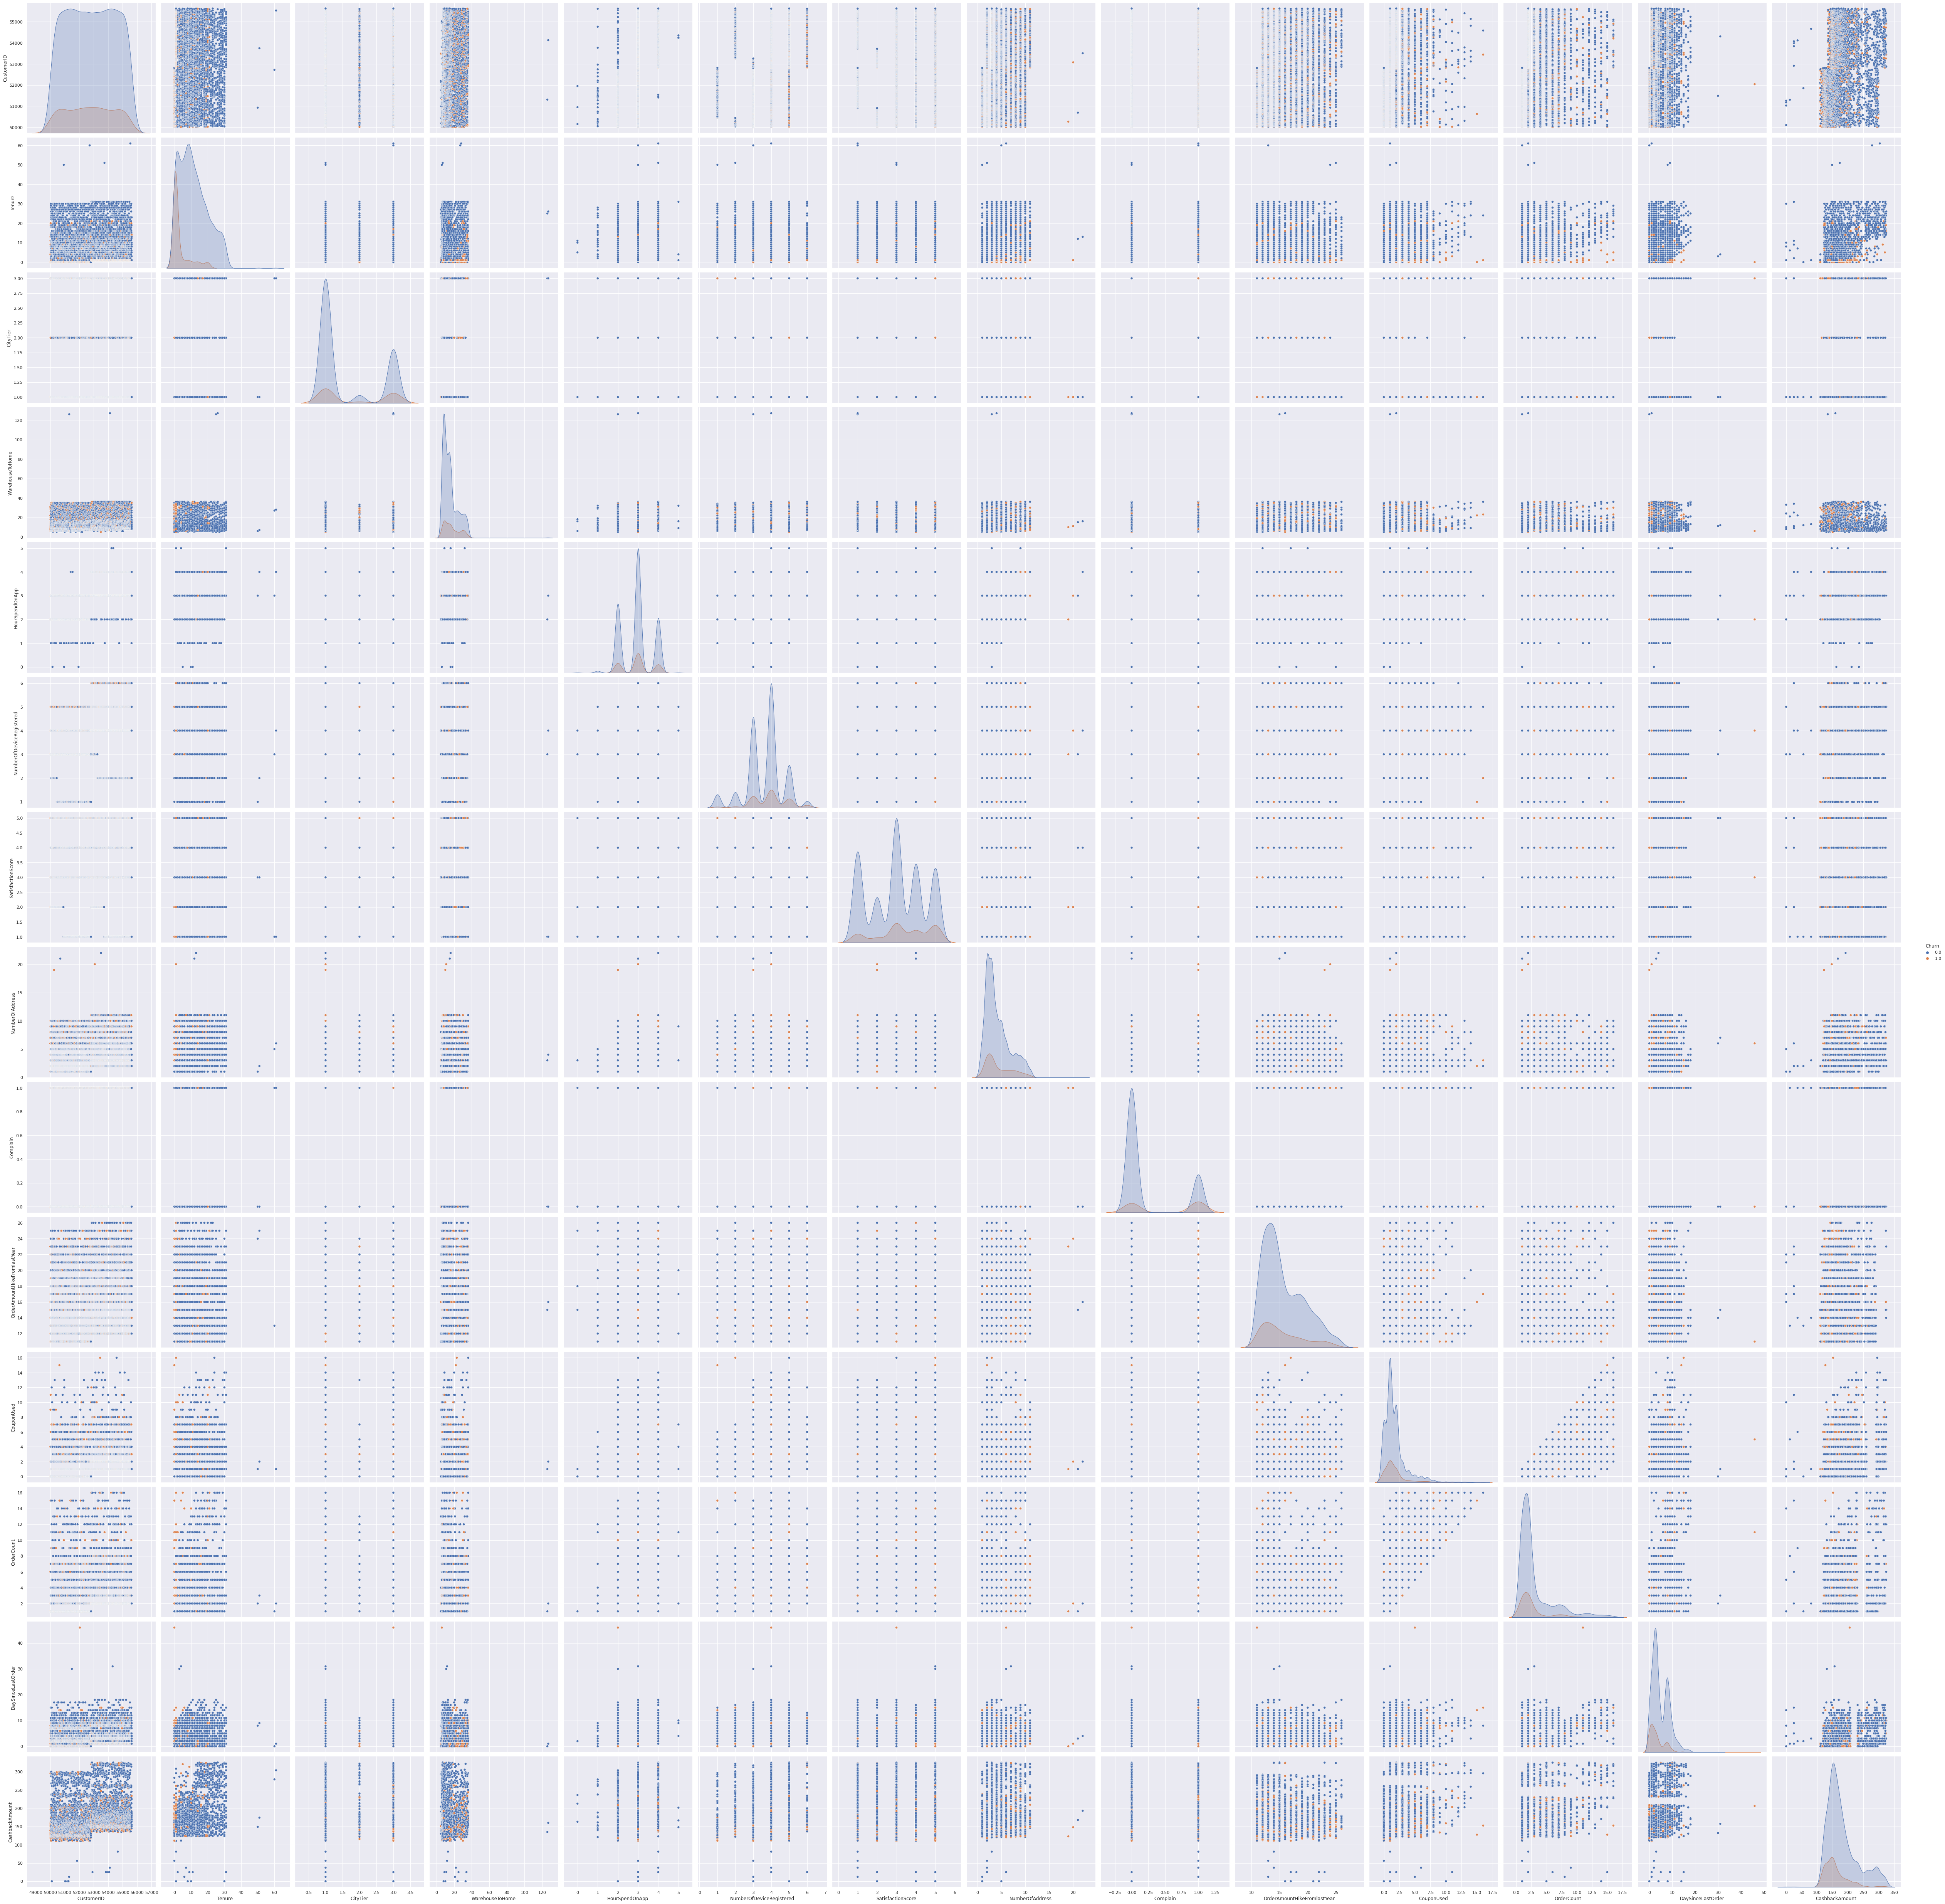

In [ ]:
sns.set()
cols=df.columns
sns.pairplot(df[cols],hue='Churn', size=5)
plt.show()

Interpretasi :
Grafik diatas adalah multiple scatterplot antara banyak variable. 

⏺ Positif linear terlihat jelas  antara variabel OrderAccount dan CouponUsed yang mana jika nilai y naik begitupula dengan nilai x

In [ ]:
#category plots /kalau perlu

<ul>Memasangkan feature numerik dan kategorikal
<li>Apakah feature categorical memiliki kolerasi dengan target?</li>
<li>Apakah ada 2 feature categorical yang terlihat jelas berkolerasi</li>

### Hypothesis Testing

In [49]:
#membuat dataset copy
ht = df.copy()
ht.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [50]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#### Hyphotesis Testing 1 - Complain

<ul>Hypothesis Testing to Complain
  <li>H0 : Complain not have a significant relationship with Churn</li>
  <li>H1 : Complain have a significant relationship with Churn</li>
</ul>
<i> Level of significance : 5%</i>

In [53]:
def complain (x):
    if x == 1:
        return 'Complained'
    else:   
        return 'No Complain'

In [55]:
def churn (x):
    if x == 1:
        return 'Churn'
    else:
        return 'Not Churn'

In [56]:
ht['Complain'] = ht['Complain'].apply(complain)
ht['Complain'].value_counts()

No Complain    4026
Complained     1604
Name: Complain, dtype: int64

In [57]:
ht['Churn'] = ht['Churn'].apply(churn)
ht['Churn'].value_counts()

Not Churn    4682
Churn         948
Name: Churn, dtype: int64

In [58]:
ht_group = ht.groupby(['Complain','Churn']).agg(user_count=('CustomerID','count')).reset_index()
ht_group

Complain      Churn  user_count
0   Complained      Churn         508
1   Complained  Not Churn        1096
2  No Complain      Churn         440
3  No Complain  Not Churn        3586

In [59]:
ht_group2 = ht.groupby(['Complain']).agg(total_user=('CustomerID','count')).reset_index()
ht_group2

Complain  total_user
0   Complained        1604
1  No Complain        4026

In [60]:
group_ratio = ht_group.merge(ht_group2,on='Complain')
group_ratio['Ratio'] = round(group_ratio['user_count']/group_ratio['total_user']*100,2)
group_ratio

Complain      Churn  user_count  total_user  Ratio
0   Complained      Churn         508        1604  31.67
1   Complained  Not Churn        1096        1604  68.33
2  No Complain      Churn         440        4026  10.93
3  No Complain  Not Churn        3586        4026  89.07

In [61]:
f,ax = plt.subplots(figsize=(7,5))
sns.barplot(data=group_ratio,
            x='Complain',
            y='Ratio',
            hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

[Text(0, 0, '68.33'), Text(0, 0, '89.07')]

#####<b> Chi-Squared Test </b><br>
Because the two variables are categorical.
<ul>
<li>Independence test<br><p align = 'justify'>
The test for independence might be used to asses the association between categorical variables. A chi-squared test for independence might indicate how probable it is that any observed divergence between the actual frequancies in the data and these theoretical predictions can be explained by random chance.</p></li>


Reference : <a href = 'https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/'>How to use the Chi-Squared Test for two categorical variables?</a>

In [62]:
contingency_table = pd.crosstab(df['Churn'],df['Complain'], margins=True)
print('Contingency table :\n', contingency_table)

Contingency table :
 Complain     0     1   All
Churn                     
0         3586  1096  4682
1          440   508   948
All       4026  1604  5630


<p align = 'justify'>A contingency table <i>(cross-tabulation or crosstab)</i> is type of table used in statistics to display the relationship between two categorical variables. The table is organized such that each row represents a different category of one variable, and each column represents a different category of the other variable. The intersection of a row and column contains the frequency or count of the cases that belong to both categories.</p>

In [63]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi Squared Statistic:  {chi2_stat:.5g}')
print('p Value:')
print(round(p_value,2))
print(f'Degree of Freedom:      {dof}')
print(f'Expected Frequencies:\n',expected)

Chi Squared Statistic:  352.41
p Value:
0.0
Degree of Freedom:      4
Expected Frequencies:
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


The critical value for the chi-squared test with a degree of freedom of 4 and alpha 0.05 is 9.488. Since the test statistic (352.41) exceeds the critical value, the null hyphotesis is rejected.

<ul>
<li>Goodness of Fit<br><p align = 'justify'>
Determine how well a theoretical model fits the observed data. In this test, the observed frequencies are compared to the expected frequencies, which are calculated from the theorretical model. The test determines if the difference between the observed and expected frequencies is significant</p></li>

In [64]:
obs_values = contingency_table.values
print('Observed Values:\n',obs_values)

Observed Values:
 [[3586 1096 4682]
 [ 440  508  948]
 [4026 1604 5630]]


In [65]:
ev = stats.chi2_contingency(contingency_table)
expected_values = ev[3]
print("Expected Values :\n",expected_values)

Expected Values :
 [[3348.08738899 1333.91261101 4682.        ]
 [ 677.91261101  270.08738899  948.        ]
 [4026.         1604.         5630.        ]]


In [66]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
degree_of=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",degree_of)

Degree of Freedom: 2


In [67]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 352.4051364983911


<p align = 'justify'>The critical value for the chi-square test with a degree of freedom of 2 and alpha 0.05 is 5.991. Since the test statistic (352.40) exceeds the critical value, the null hypothesis is rejected. Therefore, Complain and Churn experience have a significant variation in the distribution. This could be concluded that there is a substantial dependency of Complain on relevant experience according to the data.</p>

<b>Conclusion</b>: Reject the null hypothesis, the sample data provides enough evidence to suggest that the null hypothesis is not true</p>

#### Hyphotesys Testing 2 - Tenure

In [ ]:
ht[['Tenure']].describe()

Tenure
count  5366.000000
mean     10.189899
std       8.557241
min       0.000000
25%       2.000000
50%       9.000000
75%      16.000000
max      61.000000

In [ ]:
def group(x):
    try:
        if x['Tenure'] <= 2:
            group = 'Low'
        elif x['Tenure'] <= 16:
            group = 'Mid'
        elif x['Tenure'] >16:
            group = 'High'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['tenure_group'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
ht.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
5248     55249.0    0.0    16.0         Mobile Phone       1.0   
3818     53819.0    0.0    10.0             Computer       1.0   
1531     51532.0    0.0    13.0         Mobile Phone       1.0   
4722     54723.0    1.0     1.0         Mobile Phone       1.0   
367      50368.0    0.0    21.0         Mobile Phone       1.0   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
5248              9.0          Credit Card    Male             4.0   
3818             13.0           Debit Card    Male             4.0   
1531             10.0          Credit Card  Female             2.0   
4722              7.0                  UPI    Male             4.0   
367               6.0           Debit Card  Female             2.0   

      NumberOfDeviceRegistered  ... MaritalStatus  NumberOfAddress Complain  \
5248                       5.0  ...       Married              6.0      0.0   
3818                       2.0  ...       Married              5.0      1.0   
1531                       3.0  ...       Married              2.0      0.0   
4722                       4.0  ...        Single              3.0      1.0   
367                        4.0  ...      Divorced              8.0      0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
5248                         15.0         1.0         2.0                1.0   
3818                         14.0         2.0         2.0                3.0   
1531                         14.0         NaN         9.0                9.0   
4722                         14.0         7.0         8.0                9.0   
367                          11.0         0.0         NaN                2.0   

      CashbackAmount  tenure_group    period  
5248          173.41           Mid     early  
3818          180.62           Mid      None  
1531          290.33           Mid  longtime  
4722          151.86           Low  longtime  
367           254.02          High     early  

[5 rows x 22 columns]

In [ ]:
csq_tenure = ht.groupby(['tenure_group','Churn']).size().unstack(fill_value=0)
csq_tenure.columns = ['Churn0','Churn1']
csq_tenure

Churn0  Churn1
tenure_group                
High            1183      48
Low              730     635
Mid             2586     184

In [ ]:
ct0 = stats.chisquare(csq_tenure['Churn0'])
ct1 = stats.chisquare(csq_tenure['Churn1'])
print('Nilai Statistic Tenure :', ct1.statistic, ', dan',
      'PValue Tenure :', ct1.pvalue)

Nilai Statistic Tenure : 653.363321799308 , dan PValue Tenure : 1.3303237125331815e-142


#### Hyphotesys Testing 3 - DaySinceLastOrder

In [ ]:
ht[['DaySinceLastOrder']].describe()

DaySinceLastOrder
count        5323.000000
mean            4.543491
std             3.654433
min             0.000000
25%             2.000000
50%             3.000000
75%             7.000000
max            46.000000

In [ ]:
def group(x):
    try:
        if x['DaySinceLastOrder'] <= 2:
            group = 'early'
        elif x['DaySinceLastOrder'] > 7:
            group = 'longtime'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['period'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
ht.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1197     51198.0    0.0    19.0         Mobile Phone       1.0   
2638     52639.0    0.0    16.0             Computer       1.0   
4897     54898.0    0.0    15.0         Mobile Phone       1.0   
5204     55205.0    0.0    23.0         Mobile Phone       1.0   
4706     54707.0    0.0     3.0         Mobile Phone       3.0   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1197              8.0           Debit Card    Male             2.0   
2638              NaN           Debit Card    Male             2.0   
4897             14.0          Credit Card  Female             3.0   
5204             12.0                  COD    Male             4.0   
4706             17.0           Debit Card    Male             4.0   

      NumberOfDeviceRegistered  ... MaritalStatus  NumberOfAddress Complain  \
1197                       3.0  ...       Married              4.0      0.0   
2638                       3.0  ...        Single              5.0      0.0   
4897                       4.0  ...        Single              8.0      0.0   
5204                       4.0  ...       Married              4.0      0.0   
4706                       4.0  ...        Single              3.0      0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
1197                         14.0         1.0         4.0                7.0   
2638                         13.0         1.0         1.0                2.0   
4897                         15.0         3.0         3.0                2.0   
5204                         15.0         1.0         2.0                3.0   
4706                         12.0         2.0         2.0                1.0   

      CashbackAmount  tenure_group  period  
1197          185.78          High    None  
2638          124.38           Mid   early  
4897          175.03           Mid   early  
5204          191.51          High    None  
4706          151.42           Mid   early  

[5 rows x 22 columns]

In [ ]:
csq_DSLO = ht.groupby(['period','Churn']).size().unstack(fill_value=0)
csq_DSLO.columns = ['Churn0', 'Churn1']
csq_DSLO

Churn0  Churn1
period                  
early       1428     474
longtime    1179     123

In [ ]:
cd1 = stats.chisquare(csq_DSLO['Churn1'])
print('Nilai Statistic DaySinceLastOrder  :', cd1.statistic, ', dan',
      'PValue DaySinceLastOrder :', cd1.pvalue)

Nilai Statistic DaySinceLastOrder  : 206.36683417085428 , dan PValue DaySinceLastOrder : 8.522202972224719e-47


####Hyphotesys Testing 4 - Satisfaction

In [ ]:
ht[['SatisfactionScore']].describe()

SatisfactionScore
count        5630.000000
mean            3.066785
std             1.380194
min             1.000000
25%             2.000000
50%             3.000000
75%             4.000000
max             5.000000

In [ ]:
def group(x):
    try:
        if x['SatisfactionScore'] <= 2:
            group = 'Not Satisfy'
        elif x['SatisfactionScore'] <=3:
            group = 'Netral'
        elif x['SatisfactionScore'] >=4:
            group = 'Satisfy'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['Satisfaction_category'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
ht.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1707     51708.0    0.0     0.0             Computer       3.0   
5034     55035.0    0.0     4.0         Mobile Phone       1.0   
4608     54609.0    0.0    14.0         Mobile Phone       1.0   
3973     53974.0    0.0     2.0                Phone       1.0   
1619     51620.0    0.0     0.0                Phone       1.0   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
1707              NaN                   CC    Male             2.0   
5034             14.0           Debit Card    Male             3.0   
4608             13.0           Debit Card  Female             4.0   
3973              7.0           Debit Card    Male             3.0   
1619              9.0                   CC    Male             3.0   

      NumberOfDeviceRegistered  ... SatisfactionScore  MaritalStatus  \
1707                       3.0  ...               1.0         Single   
5034                       4.0  ...               3.0        Married   
4608                       4.0  ...               3.0         Single   
3973                       4.0  ...               1.0        Married   
1619                       4.0  ...               3.0         Single   

     NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  \
1707             2.0       0.0                         24.0         2.0   
5034             3.0       0.0                         14.0         5.0   
4608             9.0       0.0                         16.0         5.0   
3973             3.0       0.0                         12.0         1.0   
1619             2.0       0.0                         17.0         1.0   

      OrderCount  DaySinceLastOrder  CashbackAmount  Satisfaction_category  
1707         2.0                2.0          126.10            Not Satisfy  
5034         9.0               10.0          159.91                 Netral  
4608         NaN               14.0          257.37                 Netral  
3973         2.0                4.0          145.44            Not Satisfy  
1619         1.0                0.0          132.30                 Netral  

[5 rows x 21 columns]

In [ ]:
csq_satisfaction = ht.groupby(['Satisfaction_category','Churn']).size().unstack(fill_value=0)
csq_satisfaction.columns = ['Churn0','Churn1']
csq_satisfaction

Churn0  Churn1
Satisfaction_category                
Netral                   1406     292
Not Satisfy              1542     208
Satisfy                  1734     448

In [ ]:
ct0 = stats.chisquare(csq_satisfaction ['Churn0'])
ct1 = stats.chisquare(csq_satisfaction ['Churn1'])
print('Nilai Statistic Satisfaction :', ct1.statistic, ', dan',
      'PValue Satisfaction :', ct1.pvalue)

Nilai Statistic Satisfaction : 93.87341772151899 , dan PValue Satisfaction : 4.127112839273471e-21


Hipotesis Testing 5 - Cashback Amount

In [ ]:
ht[['CashbackAmount']].describe()

CashbackAmount
count     5630.000000
mean       177.223030
std         49.207036
min          0.000000
25%        145.770000
50%        163.280000
75%        196.392500
max        324.990000

In [ ]:
def group(x):
    try:
        if x['CashbackAmount'] <= 146:
            group = 'Not Much'
        elif x['CashbackAmount'] <= 195:
            group = 'Mid'
        elif x['CashbackAmount'] >=196:
            group = 'A lot'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['cashback_category'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
ht.sample(5)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
4248     54249.0    0.0     4.0         Mobile Phone       1.0   
2318     52319.0    0.0     8.0         Mobile Phone       1.0   
110      50111.0    0.0    16.0         Mobile Phone       3.0   
2895     52896.0    1.0     1.0         Mobile Phone       3.0   
366      50367.0    0.0    16.0             Computer       1.0   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
4248              9.0           Debit Card    Male             5.0   
2318              7.0          Credit Card  Female             2.0   
110              22.0             E wallet  Female             3.0   
2895             34.0             E wallet  Female             3.0   
366              15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered  ... MaritalStatus  NumberOfAddress Complain  \
4248                       5.0  ...       Married              3.0      0.0   
2318                       4.0  ...       Married              1.0      0.0   
110                        3.0  ...      Divorced              6.0      1.0   
2895                       4.0  ...      Divorced              3.0      0.0   
366                        3.0  ...       Married              4.0      1.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
4248                         20.0         4.0        11.0                9.0   
2318                         12.0         0.0         1.0                0.0   
110                          22.0         0.0         NaN                9.0   
2895                         23.0         2.0         2.0               10.0   
366                          13.0         2.0         4.0                7.0   

      CashbackAmount  Satisfaction_category  cashback_category  
4248          166.52            Not Satisfy                Mid  
2318          153.63            Not Satisfy                Mid  
110           260.64            Not Satisfy              A lot  
2895          201.39            Not Satisfy              A lot  
366           156.79                 Netral                Mid  

[5 rows x 22 columns]

In [ ]:
csq_cashback= ht.groupby(['cashback_category','Churn']).size().unstack(fill_value=0)
csq_cashback.columns = ['Churn0','Churn1']
csq_cashback

Churn0  Churn1
cashback_category                
A lot                1266     156
Mid                  2328     428
Not Much             1075     362

In [ ]:
ct0 = stats.chisquare(csq_cashback ['Churn0'])
ct1 = stats.chisquare(csq_cashback ['Churn1'])
print('Nilai Statistic Cashback :', ct1.statistic, ', dan',
      'PValue Cashback :', ct1.pvalue)

Nilai Statistic Cashback : 127.67019027484145 , dan PValue Cashback : 1.8913435819177034e-28


#### Hypotesis Testing 6 - City Tier

In [ ]:
ht[['CityTier']].describe()

CityTier
count  5630.000000
mean      1.654707
std       0.915389
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max       3.000000

In [ ]:
def group(x):
    try:
        if x['CityTier'] <= 2:
            group = 'Small Population'
        elif x['CityTier'] >= 3:
            group = 'Big Population'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['City_Tier_Category'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
csq_citytier = ht.groupby(['City_Tier_Category','Churn']).size().unstack(fill_value=0)
csq_citytier.columns = ['Churn0','Churn1']
csq_citytier

Churn0  Churn1
City_Tier_Category                
Big Population         368    1354
Small Population       580    3328

In [ ]:
ct0 = stats.chisquare(csq_citytier ['Churn0'])
ct1 = stats.chisquare(csq_citytier ['Churn1'])
print('Nilai Statistic dari City_Tier :', ct1.statistic, ', dan',
      'PValue City_tier :', ct1.pvalue)

Nilai Statistic dari City_Tier : 832.2674070909868 , dan PValue City_tier : 5.2085540044946095e-183


#### Hypotesis Testing 7 - Warehouse To Home

In [ ]:
ht[['WarehouseToHome']].describe()

WarehouseToHome
count      5379.000000
mean         15.639896
std           8.531475
min           5.000000
25%           9.000000
50%          14.000000
75%          20.000000
max         127.000000

In [ ]:
def group(x):
    try:
        if x['WarehouseToHome'] <= 9:
            group = 'Close'
        elif x['WarehouseToHome'] <= 14:
            group = 'Near '
        elif x['WarehouseToHome'] >20:
            group = 'Far'
        else :
            group = None
        return group

    except:
        print['salah input']
        
ht['Warehouse_To_Home_Category'] = ht.apply(lambda x: group(x), axis=1)

In [ ]:
csq_wthome = ht.groupby(['Warehouse_To_Home_Category','Churn']).size().unstack(fill_value=0)
csq_wthome.columns = ['Churn0','Churn1']
csq_wthome

Churn0  Churn1
Warehouse_To_Home_Category                
Close                          222    1473
Far                            274    1069
Near                           176    1100

In [ ]:
ct0 = stats.chisquare(csq_wthome ['Churn0'])
ct1 = stats.chisquare(csq_wthome ['Churn1'])
print('Nilai Statistic dari Warehouse_To_Home :', ct1.statistic, ', dan',
      'PValue Warehouse_To_Home :', ct1.pvalue)

Nilai Statistic dari Warehouse_To_Home : 83.28006589785832 , dan PValue Warehouse_To_Home : 8.240687854767957e-19


<ul><b>Poin-poin yang harus diperhatikan untuk stage selanjutnya:</b><br>
<li>Mengganti tipe data yang janggal</li>
<li>Ada redundan</li>
<li>Menangani outlier pada kolom

#Data Pre-Processing <br>

<li>Missing Data</li>
<li>Duplicated Data</li>
<li>Outliers</li>
<li>Feature Transformation</li>
<li>Feature Encoding</li>
<li>Class Imbalance</li>

## Missing Data Handling

# ML Model & Model Evaluation <br>
